# ランダムフォレストによる回帰

## ライブラリのインポート

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## データセットのインポート

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## データセットの前処理

In [3]:
train_df.head()

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [4]:
test_df.head()

,row_id,date,country,store,product
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques


In [5]:
print('学習データのデータ数:{}'.format(len(train_df)))
print('テストデータのデータ数:{}'.format(len(test_df)))

学習データのデータ数:70128
テストデータのデータ数:17520


In [6]:
train_df.describe()

,row_id,num_sold
count,70128.000000,70128.000000
mean,35063.500000,194.296986
std,20244.354176,126.893874
min,0.000000,19.000000
25%,17531.750000,95.000000
50%,35063.500000,148.000000
75%,52595.250000,283.000000
max,70127.000000,986.000000


In [7]:
train_df.columns

Index(['row_id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')

In [8]:
test_df.columns

Index(['row_id', 'date', 'country', 'store', 'product'], dtype='object')

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    70128 non-null  int64 
 1   date      70128 non-null  object
 2   country   70128 non-null  object
 3   store     70128 non-null  object
 4   product   70128 non-null  object
 5   num_sold  70128 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.2+ MB


### 年のデータの抽出

In [10]:
train_df['date'][0]

'2017-01-01'

In [11]:
train_df['year'] = train_df['date'].apply(lambda x: int(x[:4]))
test_df['year'] = test_df['date'].apply(lambda x: int(x[:4]))
train_df['year']

0        2017
1        2017
2        2017
3        2017
4        2017
         ... 
70123    2020
70124    2020
70125    2020
70126    2020
70127    2020
Name: year, Length: 70128, dtype: int64

###　年ごとのデータ数

<AxesSubplot:>

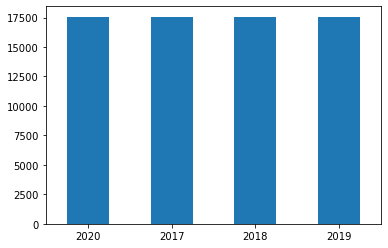

In [12]:
train_df['year'].value_counts().plot(kind='bar', rot=0)

### 年ごとのnum_soldの推移
- 年ごとにnum_soldが増加する傾向　→　そのままの数字を使う

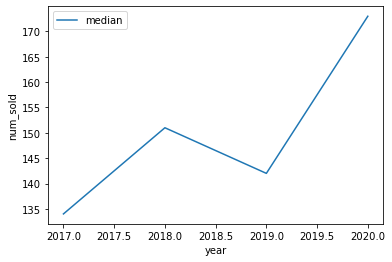

In [13]:
plt.plot(train_df.groupby('year').median()['num_sold'], label='median')
# plt.plot(train_df.groupby('year').mean()['num_sold'], label='mean')
plt.xlabel('year')
plt.ylabel('num_sold')
plt.legend()

### 月データの抽出

In [14]:
train_df['date'][0]

'2017-01-01'

In [15]:
train_df['month'] = train_df['date'].apply(lambda x: int(x[5:7]))
test_df['month'] = test_df['date'].apply(lambda x: int(x[5:7]))
train_df['month']

0         1
1         1
2         1
3         1
4         1
         ..
70123    12
70124    12
70125    12
70126    12
70127    12
Name: month, Length: 70128, dtype: int64

### 月ごとのデータ数

<AxesSubplot:>

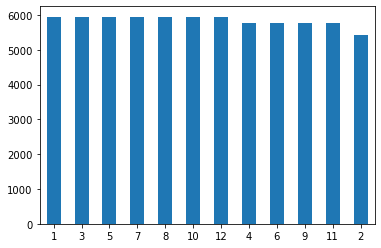

In [16]:
train_df['month'].value_counts().plot(kind='bar', rot=0)

### 月ごとのnum_soldの推移
- 月ごとの変化が毎年似ている　→ 2月ごとにone-hotencoding

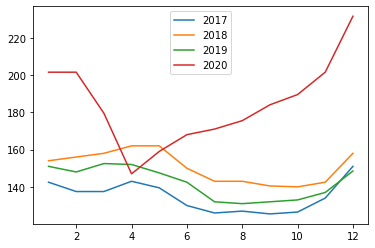

In [17]:
train_df_2017 = train_df[train_df['year'] == 2017]
train_df_2018 = train_df[train_df['year'] == 2018]
train_df_2019 = train_df[train_df['year'] == 2019]
train_df_2020 = train_df[train_df['year'] == 2020]

plt.plot(train_df_2017.groupby('month').median()['num_sold'], label='2017')
plt.plot(train_df_2018.groupby('month').median()['num_sold'], label='2018')
plt.plot(train_df_2019.groupby('month').median()['num_sold'], label='2019')
plt.plot(train_df_2020.groupby('month').median()['num_sold'], label='2020')
plt.legend()

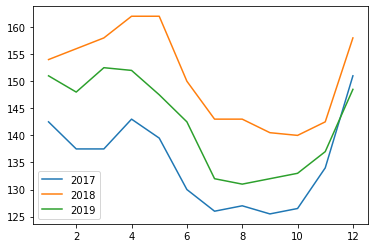

In [18]:
plt.plot(train_df_2017.groupby('month').median()['num_sold'], label='2017')
plt.plot(train_df_2018.groupby('month').median()['num_sold'], label='2018')
plt.plot(train_df_2019.groupby('month').median()['num_sold'], label='2019')
plt.legend()

In [19]:
train_df['date'][0]

'2017-01-01'

In [20]:
train_df['day'] = train_df['date'].apply(lambda x: int(x[8:]))
test_df['day'] = test_df['date'].apply(lambda x: int(x[8:]))
train_df['day']

0         1
1         1
2         1
3         1
4         1
         ..
70123    31
70124    31
70125    31
70126    31
70127    31
Name: day, Length: 70128, dtype: int64

### 日ごとのデータ数

<AxesSubplot:>

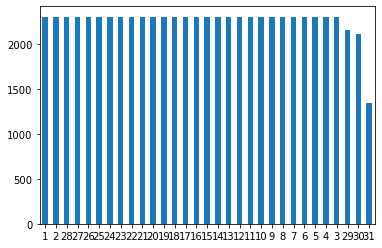

In [21]:
train_df['day'].value_counts().plot(kind='bar', rot=0)

### 日ごとのnum_soldの推移
- 約１週間ごとの変化が繰り返されている　→ 週ごとに分ける

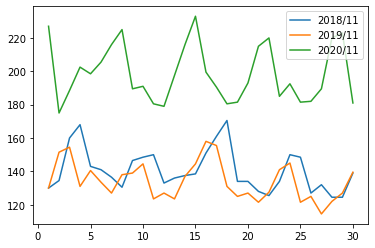

In [22]:
train_df_1 = train_df[(train_df['year'] == 2018) & (train_df['month'] == 11)]
train_df_2 = train_df[(train_df['year'] == 2019) & (train_df['month'] == 11)]
train_df_3 = train_df[(train_df['year'] == 2020) & (train_df['month'] == 11)]
plt.plot(train_df_1.groupby('day').median()['num_sold'], label='2018/11')
plt.plot(train_df_2.groupby('day').median()['num_sold'], label='2019/11')
plt.plot(train_df_3.groupby('day').median()['num_sold'], label='2020/11')
plt.legend()

## 日付データに対する前処理

In [23]:
train_df.head(2)

,row_id,date,country,store,product,num_sold,year,month,day
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017,1,1
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615,2017,1,1


In [24]:
train_df['month'] = train_df['date'].apply(lambda x: x[5:7])
test_df['month'] = test_df['date'].apply(lambda x: x[5:7])
train_df['month']

0        01
1        01
2        01
3        01
4        01
         ..
70123    12
70124    12
70125    12
70126    12
70127    12
Name: month, Length: 70128, dtype: object

In [25]:
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
train_df['weekday'] = train_df['date'].dt.weekday
test_df['weekday'] = train_df['date'].dt.weekday
train_df.groupby('weekday').mean()['num_sold']

weekday
0    184.066188
1    183.852472
2    183.343202
3    183.571372
4    192.627704
5    211.532853
6    221.159589
Name: num_sold, dtype: float64

In [26]:
train_df.head(1)

,row_id,date,country,store,product,num_sold,year,month,day,weekday
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017,01,1,6


In [27]:
train_df = train_df.drop(['date', 'day'], axis=1)
test_df = test_df.drop(['date', 'day'], axis=1)

In [28]:
train_df.head()

,row_id,country,store,product,num_sold,year,month,weekday
0,0,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017,01,6
1,1,Belgium,KaggleMart,Kaggle Getting Started,615,2017,01,6
2,2,Belgium,KaggleMart,Kaggle Recipe Book,480,2017,01,6
3,3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017,01,6
4,4,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017,01,6


### 特徴量と目的変数

In [29]:
y_col = 'num_sold'
X = train_df.loc[:, train_df.columns!=y_col]
y = train_df[y_col]

In [30]:
X = X.drop('row_id', axis=1)
index_test = test_df['row_id']
test_df = test_df.drop('row_id', axis=1)
# 数値カラムの取得
numeric_cols = X.select_dtypes(include=np.number).columns.to_list()
numeric_cols

['year', 'weekday']

### one-hot-encoding

In [31]:
X['country'].unique()

array(['Belgium', 'France', 'Germany', 'Italy', 'Poland', 'Spain'],
      dtype=object)

In [32]:
X['store'].unique()

array(['KaggleMart', 'KaggleRama'], dtype=object)

In [33]:
X['product'].unique()

array(['Kaggle Advanced Techniques', 'Kaggle Getting Started',
       'Kaggle Recipe Book', 'Kaggle for Kids: One Smart Goose'],
      dtype=object)

In [34]:
X = pd.get_dummies(X, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)

### 標準化

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

## 最適なモデル

In [49]:
n_estimators_list = np.arange(100, 201, 10)
smape_list = []
for n_estimators in n_estimators_list:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    smape = mean_absolute_percentage_error(y_test, y_pred)
    smape_list.append(smape)

Text(0, 0.5, 'test SMAPE')

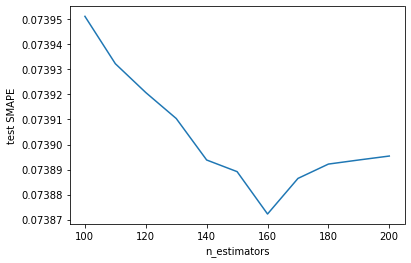

In [50]:
plt.plot(n_estimators_list, smape_list)
plt.xlabel('n_estimators')
plt.ylabel('test SMAPE')

## モデルの学習

In [51]:
model = RandomForestRegressor(n_estimators_list[np.argmin(smape_list)])
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=160)

In [52]:
y_pred = model.predict(X_test)
smape = mean_absolute_percentage_error(y_test, y_pred)
smape

0.07385898886441725

## テストデータに対する予測

In [53]:
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

In [54]:
X_test = test_df.values

In [56]:
y_pred = model.predict(X_test)

/Users/atsus/opt/anaconda3/envs/py3-TF2.0/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [57]:
y_pred

array([482.55392857, 349.33433036, 340.32072917, ..., 138.76166757,
       113.39842758, 184.73266369])

In [58]:
data = {
    'row_id': index_test,
    'num_sold': y_pred
}
sub = pd.DataFrame(data)

In [59]:
sub.head()

,row_id,num_sold
0,70128,482.553929
1,70129,349.334330
2,70130,340.320729
3,70131,513.458091
4,70132,169.746272


In [60]:
sub.to_csv('submission_7.csv', index=False)